In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA

In [2]:
cust=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\assigmets\\Case study-1//Customer.csv")
prod=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\assigmets\\Case study-1//prod_cat_info.csv")
trans=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\assigmets\\Case study-1//Transactions.csv")

In [3]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
cust.shape

(5647, 4)

In [6]:
prod.shape

(23, 4)

In [7]:
trans.shape

(23053, 10)

In [8]:
prod.rename(columns={"prod_cat_code":"prod_subcat_code"},inplace=True)

In [9]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final

In [11]:
prod_con=pd.merge(left=trans,right=prod,on = ["prod_cat_code","prod_subcat_code"],how='left')

In [12]:
prod_con

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [13]:
prod_con.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [14]:
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [15]:
cust_fin=pd.merge(left=prod_con,right=cust,right_on="customer_Id",left_on="cust_id",how="left")

In [16]:
cust_fin.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [17]:
cust_fin.shape

(23053, 16)

In [18]:
trans.shape

(23053, 10)

# Rows of both the 'cust_fin' and 'trans' table are same.That means all the transactions done at the Retail Store are present in the 'cust_fin'table
         

In [19]:
cust_fin.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [20]:
cust_fin.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [21]:
cust_fin["DOB"]=pd.to_datetime(cust_fin["DOB"],format="%d-%m-%Y")

In [22]:
cust_fin.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [23]:
cust_fin["tran_date"]=pd.to_datetime(cust_fin["tran_date"])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or specify in

In [24]:
cust_fin["tran_date"].head(10)

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
5   2014-02-23
6   2014-02-22
7   2014-02-22
8   2014-02-22
9   2014-02-21
Name: tran_date, dtype: datetime64[ns]

In [25]:
cust_fin.duplicated().sum()

13

In [26]:
cust_fin.drop_duplicates(inplace=True)

In [27]:
cust_fin.duplicated().sum()

0

# 2. Prepare a summary report for the merged data set.

(a)Get the column names and their corresponding data types

In [28]:
cust_fin.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [29]:
cust_fin.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

(b)Top/Bottom 10 observations

In [30]:
cust_fin.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [31]:
cust_fin.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


(c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [32]:
cust_fin.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


(d) Frequency tables for all the categorical variables

In [33]:
cust_fin.loc[:,cust_fin.dtypes=='object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


# 3) Generate histograms for all continuous variables and frequency bars for categorical variables

In [34]:
conti_cust = cust_fin.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [35]:
conti_cust.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

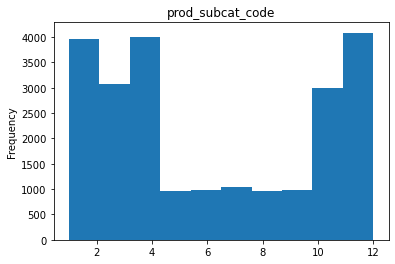

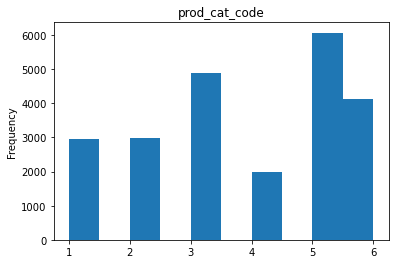

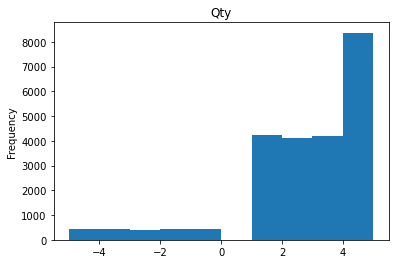

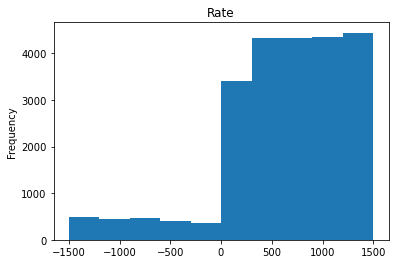

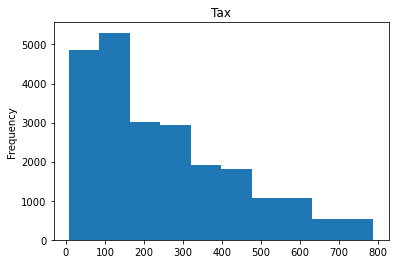

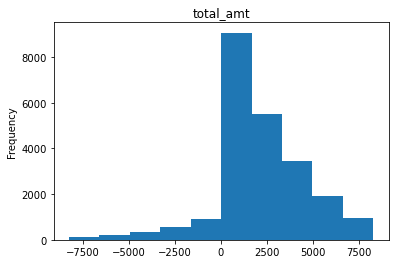

In [36]:
for var in conti_cust.columns:
    conti_cust[var].plot(kind="hist")
    plt.title(var)
    plt.show()

In [37]:
cate_cust=cust_fin.loc[:,cust_fin.dtypes=='object']

In [38]:
cate_cust.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


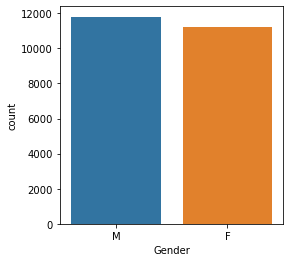

In [39]:
plt.figure(figsize=(4,4))
sns.countplot(cate_cust['Gender'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


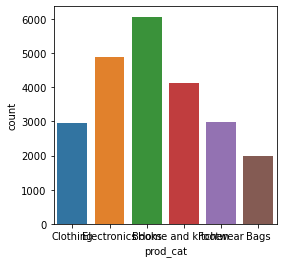

In [40]:
plt.figure(figsize=(4,4))
sns.countplot(cate_cust['prod_cat'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


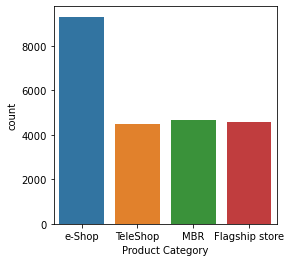

In [41]:
plt.figure(figsize=(4,4))
sns.countplot(cate_cust['Store_type'])
plt.xlabel('Product Category')
plt.show()

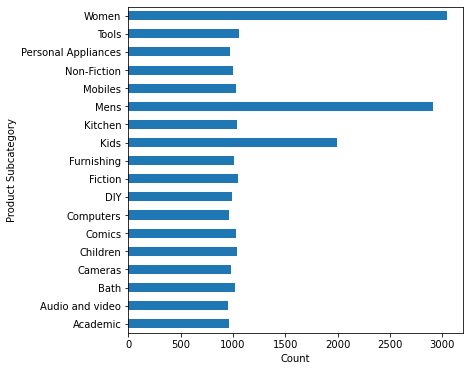

In [42]:
plt.figure(figsize=(6,6))
cate_cust.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

# (4) Calculate the following information using the merged dataset:

(a) Time period of the available transaction data

In [43]:
cust_fin.sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0


In [44]:
min_date=cust_fin["tran_date"].min()

In [45]:
max_date=cust_fin["tran_date"].max()

In [46]:
print("Time period for the transaction data is from "+pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period for the transaction data is from 02-01-2011 to 02-12-2014


(b) Count of transactions where the total amount of transaction was negative

In [47]:
negative_trans=cust_fin.loc[cust_fin["total_amt"]<0,"transaction_id"].count()
print("the count of negative transaction is",negative_trans)

the count of negative transaction is 2164


# 5. Analyze which product categories are more popular among females vs male customers.

In [48]:
cust_fin.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [49]:
prod_gend=cust_fin.groupby(["prod_cat","Gender"])[["Qty"]].sum().reset_index()

In [50]:
prod_gend

,prod_cat,Gender,Qty
0,Bags,F,2364
1,Bags,M,2346
2,Books,F,7080
3,Books,M,7587
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5832
7,Electronics,M,6486
8,Footwear,F,3721
9,Footwear,M,3561


In [51]:
prod_gend.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


# 6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [52]:
cust_group=cust_fin.groupby('city_code')['customer_Id'].count().sort_values(ascending=False)

In [53]:
cust_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

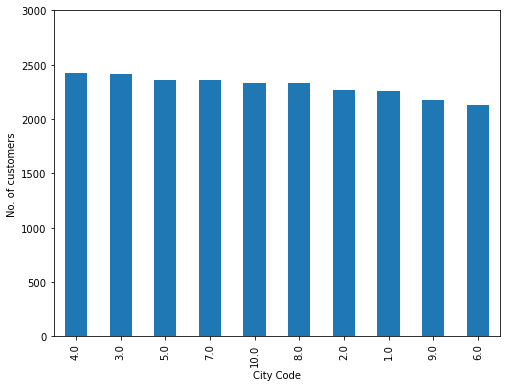

In [54]:
plt.figure(figsize=(8,6))
cust_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [55]:
per=round((cust_group[4.0]/cust_group.sum())*100,2)

In [56]:
per

10.52

In [57]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",per)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.52


# (7) Which store type sells the maximum products by value and by quantity?

In [58]:
cust_fin.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_12820\3177392066.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cust_fin.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty", ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [59]:
print('e-Shop store sell the maximum products by value and by quantity')

e-Shop store sell the maximum products by value and by quantity


# (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [60]:
store_group=round(cust_fin.pivot_table(index="prod_cat",columns="Store_type",values="total_amt",aggfunc="sum"),2)

In [61]:
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [62]:
store_group.loc[["Clothing","Electronics"],["Flagship store"]]

Store_type,Flagship store
prod_cat,
Clothing,1194423.23
Electronics,2215136.04


In [63]:
store_group.loc[["Clothing","Electronics"],["Flagship store"]].sum()

Store_type
Flagship store    3409559.27
dtype: float64

# 9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [64]:
gender_group=round(cust_fin.pivot_table(index="prod_cat",columns="Gender",values="total_amt",aggfunc="sum"),2)

In [65]:
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


In [66]:
gender_group.sort_values(["M"],ascending=False)

Gender,F,M
prod_cat,,
Books,6174590.82,6645972.78
Electronics,5019354.21,5711351.62
Home and kitchen,4133702.24,4305169.50
Clothing,3026750.80,3224079.50
Footwear,3203155.22,3020200.36
Bags,2079618.84,2046722.99


In [67]:
male_earn=gender_group.loc["Electronics","M"]

In [68]:
male_earn

5711351.62

# (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [74]:
all_trans=cust_fin.loc[cust_fin["total_amt"]>0,:]

In [75]:
all_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [76]:
uni_trans=cust_fin.groupby(["customer_Id","prod_cat","prod_subcat"])["transaction_id"].count().reset_index()

In [77]:
uni_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,2
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19274,275264,Books,Non-Fiction,1
19275,275264,Home and kitchen,Tools,1
19276,275265,Bags,Mens,1
19277,275265,Books,Academic,1


In [80]:
uni_count=uni_trans.groupby("customer_Id")["transaction_id"].count().reset_index()

In [82]:
uni_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [85]:
uni_count[uni_count["transaction_id"]>10]

,customer_Id,transaction_id


# (11) For all customers aged between 25-35, find out:
(a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [93]:
now=pd.Timestamp('now')
cust_fin["DOB"]=pd.to_datetime(cust_fin["DOB"],format="%m%d%Y")
cust_fin["DOB"]=cust_fin["DOB"].where(cust_fin["DOB"]<now,cust_fin['DOB'] -  np.timedelta64(100, 'Y'))
cust_fin['AGE'] = (now - cust_fin['DOB']).astype('<m8[Y]')                              
                               

In [95]:
cust_fin.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,49.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,41.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0


In [96]:
cust_fin["AGE"].unique()

array([41., 49., 30., 40., 51., 43., 36., 52., 38., 50., 45., 42., 33.,
       39., 31., 35., 46., 34., 44., 53., 48., 32., 47., 37.])

In [101]:
cust_fin['Age_cat'] = pd.cut(cust_fin['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [102]:
cust_fin.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35


In [104]:
cust25_35=cust_fin.groupby(["Age_cat","prod_cat"])["total_amt"].sum()

In [106]:
cust25_35.reset_index()

,Age_cat,prod_cat,total_amt
0,25-35,Bags,1005299.165
1,25-35,Books,3057379.195
2,25-35,Clothing,1726270.780
3,25-35,Electronics,2773515.745
4,25-35,Footwear,1663386.335
5,25-35,Home and kitchen,2218157.110
6,36-46,Bags,1946735.960
7,36-46,Books,6239700.740
8,36-46,Clothing,2989248.210
9,36-46,Electronics,4992454.090


In [114]:
cust25_35.loc["25-35",["Books","Electronics"]]

Age_cat  prod_cat   
25-35    Books          3057379.195
         Electronics    2773515.745
Name: total_amt, dtype: float64

In [117]:
print("Total amount spent on 'Electronics' and 'Books' product categories is" ,cust25_35.loc["25-35",["Books","Electronics"]].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 5830894.94


# (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [118]:
cust_fin

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,51.0,47-57
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,38.0,36-46
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,46.0,36-46
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,52.0,47-57


In [119]:
cust_total=cust_fin[cust_fin["Age_cat"]=="25-35"]

In [120]:
cust_total.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-01-02,F,6.0,31.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35.0,25-35


In [122]:
total_amt=cust_total[(cust_total["tran_date"]>='2014-01-01')&(cust_total["tran_date"]<='2014-03-01')]

In [123]:
total_amt

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,31.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,14460826915,269348,2014-01-01,11,6,3,84,26.460,278.460,MBR,Home and kitchen,Bath,269348,1989-02-10,M,9.0,34.0,25-35
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,33.0,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-07-11,M,7.0,31.0,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,31.0,25-35


In [127]:
print("the total amount spent is",total_amt['total_amt'].sum())

the total amount spent is 420117.685
